<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#导入工具包" data-toc-modified-id="导入工具包-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导入工具包</a></span></li><li><span><a href="#导入数据" data-toc-modified-id="导入数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>导入数据</a></span></li><li><span><a href="#数据探索" data-toc-modified-id="数据探索-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>数据探索</a></span><ul class="toc-item"><li><span><a href="#基本信息" data-toc-modified-id="基本信息-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>基本信息</a></span></li><li><span><a href="#单变量分布" data-toc-modified-id="单变量分布-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>单变量分布</a></span></li><li><span><a href="#target与X" data-toc-modified-id="target与X-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>target与X</a></span></li><li><span><a href="#相关性" data-toc-modified-id="相关性-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>相关性</a></span></li><li><span><a href="#新特征" data-toc-modified-id="新特征-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>新特征</a></span></li><li><span><a href="#离群点" data-toc-modified-id="离群点-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>离群点</a></span></li><li><span><a href="#onehot" data-toc-modified-id="onehot-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>onehot</a></span></li></ul></li><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>数据预处理</a></span><ul class="toc-item"><li><span><a href="#工具包及数据" data-toc-modified-id="工具包及数据-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>工具包及数据</a></span></li><li><span><a href="#分离数据" data-toc-modified-id="分离数据-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>分离数据</a></span></li><li><span><a href="#标准化数据" data-toc-modified-id="标准化数据-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>标准化数据</a></span></li></ul></li><li><span><a href="#模型选择" data-toc-modified-id="模型选择-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>模型选择</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#SGDRegressor" data-toc-modified-id="SGDRegressor-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>SGDRegressor</a></span></li><li><span><a href="#RidgeCV" data-toc-modified-id="RidgeCV-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>RidgeCV</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Lasso</a></span></li></ul></li><li><span><a href="#结论" data-toc-modified-id="结论-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>结论</a></span></li></ul></div>

# 导入工具包

In [145]:
# 数据读取及基本处理
import pandas as pd
import numpy as np

#查看数据分布是否对称/计算斜度/是否需要log或
from scipy.stats import skew

#可视化
import matplotlib.pyplot as plt
import seaborn as sns
# 显示文件图片
from IPython.display import display
# float显示三位小数 
pd.set_option('display.float_format', lambda x: '%.3f' % x) 
%matplotlib inline

In [146]:
# 设置一些全局的资源参数，可以进行个性化修改
import matplotlib

matplotlib.rc('figure', figsize = (12, 7))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

# 导入数据

In [147]:
data = pd.read_csv("../data/Bike-Sharing-Dataset/day.csv")
test = data[data.yr ==1] # 2012年做待预测数据
test = test.drop(["yr"], axis=1)


data = data[data.yr ==0] # 2011年做数据分析
data = data.drop(["yr"], axis=1)
data

,instant,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,1,0,6,0,2,0.344,0.364,0.806,0.160,331,654,985
1,2,2011-01-02,1,1,0,0,0,2,0.363,0.354,0.696,0.249,131,670,801
2,3,2011-01-03,1,1,0,1,1,1,0.196,0.189,0.437,0.248,120,1229,1349
3,4,2011-01-04,1,1,0,2,1,1,0.200,0.212,0.590,0.160,108,1454,1562
4,5,2011-01-05,1,1,0,3,1,1,0.227,0.229,0.437,0.187,82,1518,1600
5,6,2011-01-06,1,1,0,4,1,1,0.204,0.233,0.518,0.090,88,1518,1606
6,7,2011-01-07,1,1,0,5,1,2,0.197,0.209,0.499,0.169,148,1362,1510
7,8,2011-01-08,1,1,0,6,0,2,0.165,0.162,0.536,0.267,68,891,959
8,9,2011-01-09,1,1,0,0,0,1,0.138,0.116,0.434,0.362,54,768,822
9,10,2011-01-10,1,1,0,1,1,1,0.151,0.151,0.483,0.223,41,1280,1321


# 数据探索

## 基本信息

In [148]:
data.describe()

,instant,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000
mean,183.000,2.499,6.526,0.027,3.008,0.685,1.422,0.487,0.467,0.644,0.191,677.403,2728.359,3405.762
std,105.511,1.111,3.453,0.163,2.006,0.465,0.572,0.190,0.169,0.149,0.077,556.269,1060.110,1378.754
min,1.000,1.000,1.000,0.000,0.000,0.000,1.000,0.059,0.079,0.000,0.022,9.000,416.000,431.000
25%,92.000,2.000,4.000,0.000,1.000,0.000,1.000,0.325,0.322,0.538,0.136,222.000,1730.000,2132.000
50%,183.000,3.000,7.000,0.000,3.000,1.000,1.000,0.479,0.473,0.647,0.187,614.000,2915.000,3740.000
75%,274.000,3.000,10.000,0.000,5.000,1.000,2.000,0.657,0.612,0.742,0.235,871.000,3632.000,4586.000
max,365.000,4.000,12.000,1.000,6.000,1.000,3.000,0.849,0.841,0.973,0.507,3065.000,4614.000,6043.000


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 15 columns):
instant       365 non-null int64
dteday        365 non-null object
season        365 non-null int64
mnth          365 non-null int64
holiday       365 non-null int64
weekday       365 non-null int64
workingday    365 non-null int64
weathersit    365 non-null int64
temp          365 non-null float64
atemp         365 non-null float64
hum           365 non-null float64
windspeed     365 non-null float64
casual        365 non-null int64
registered    365 non-null int64
cnt           365 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 45.6+ KB


共16列特征, 目标为casual, registered, cnt 

无object型数据: "dteday"(dteday看做连续型)

continuous型数据:  "cnt", "registered", "casual", "windspeed", "hum", "atemp", "temp", "instant"

discrete型数据: "season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"
 
 target = "cnt"

In [150]:
#是否有空缺值
data.isnull().sum() 

instant       0
dteday        0
season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 无nan

## 单变量分布

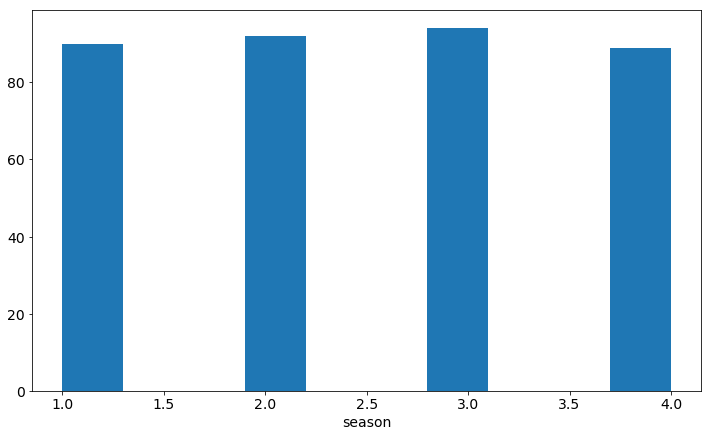

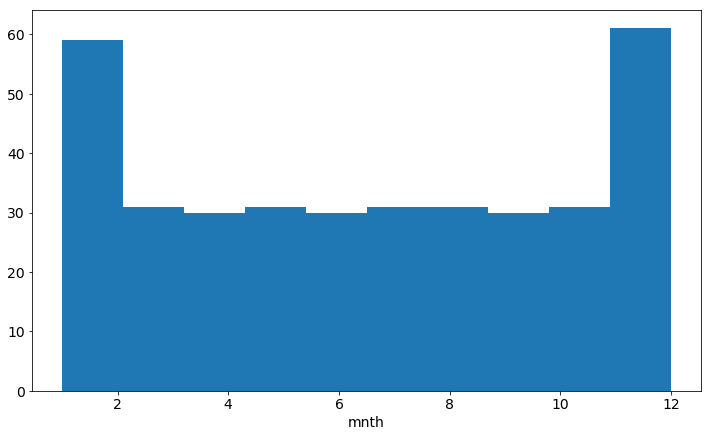

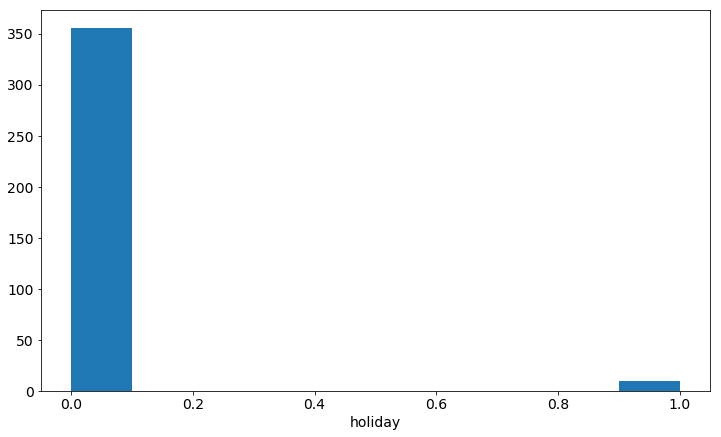

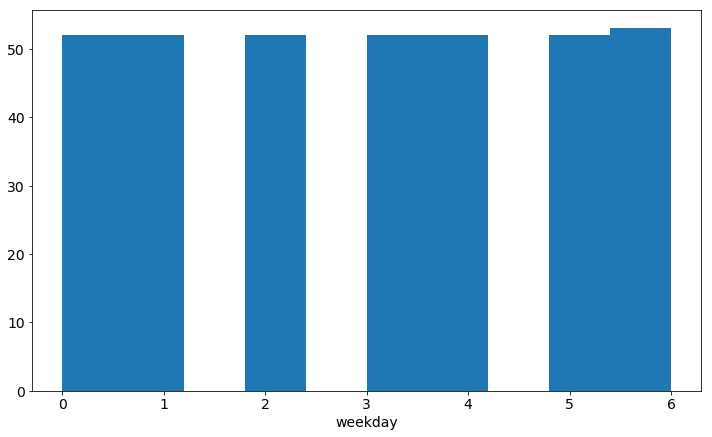

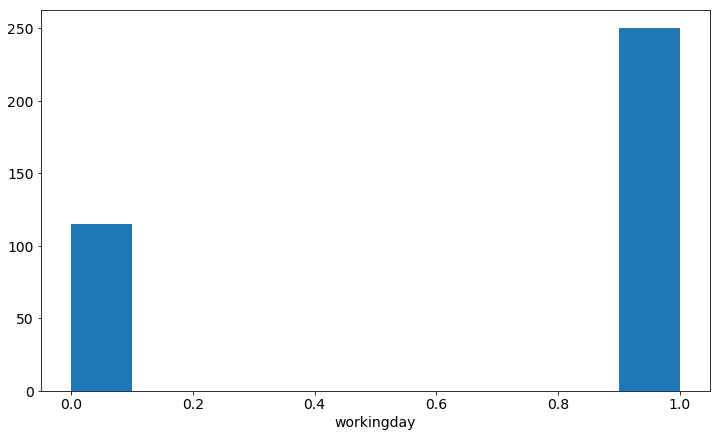

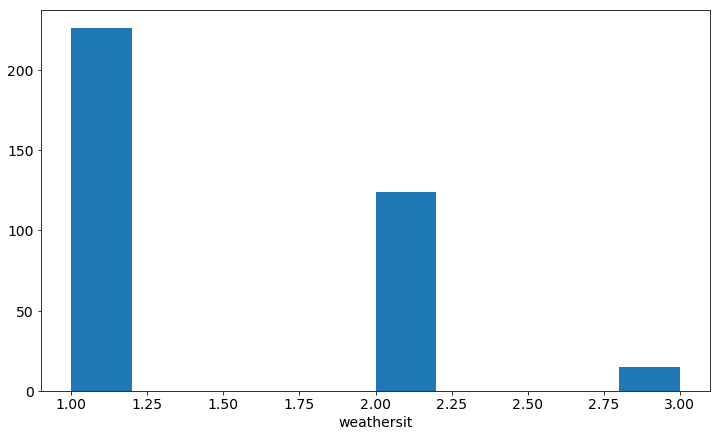

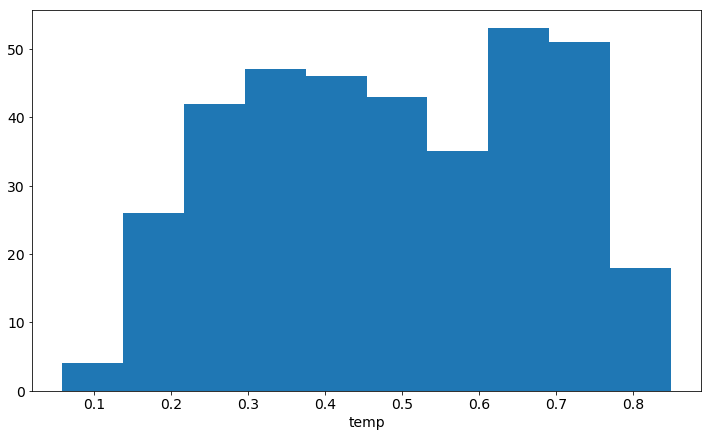

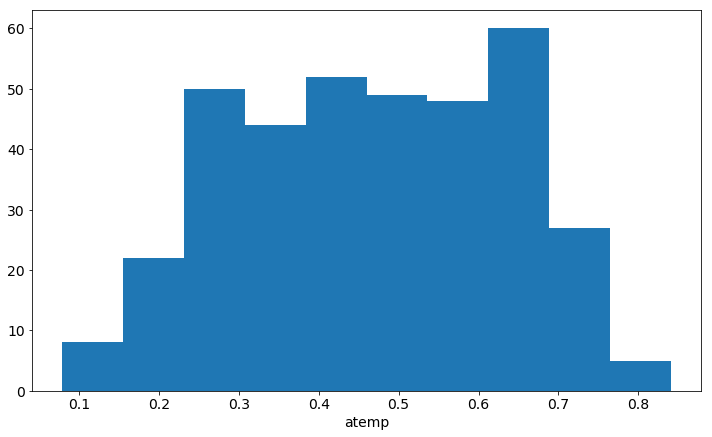

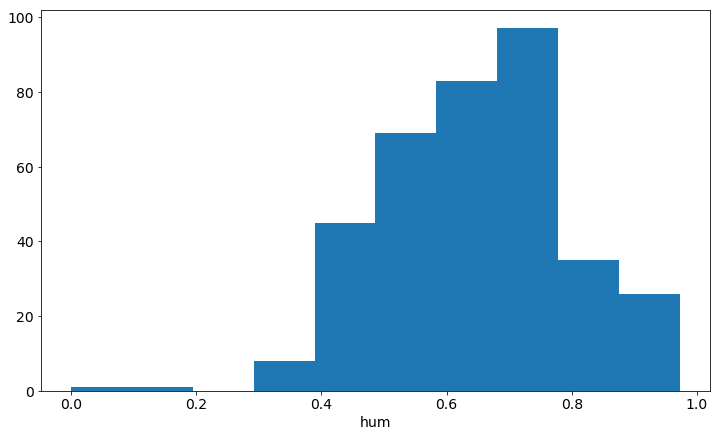

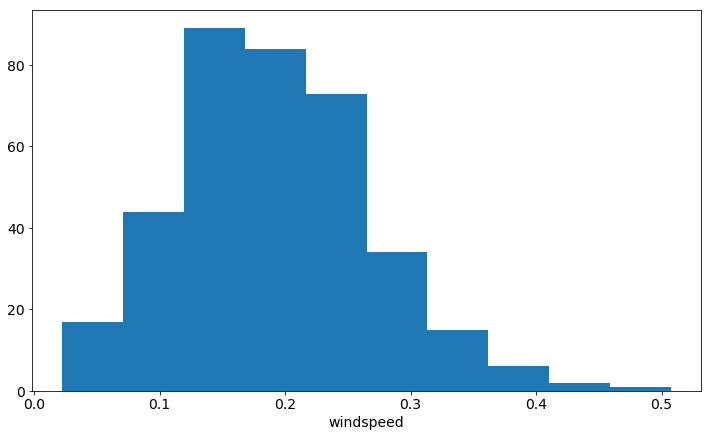

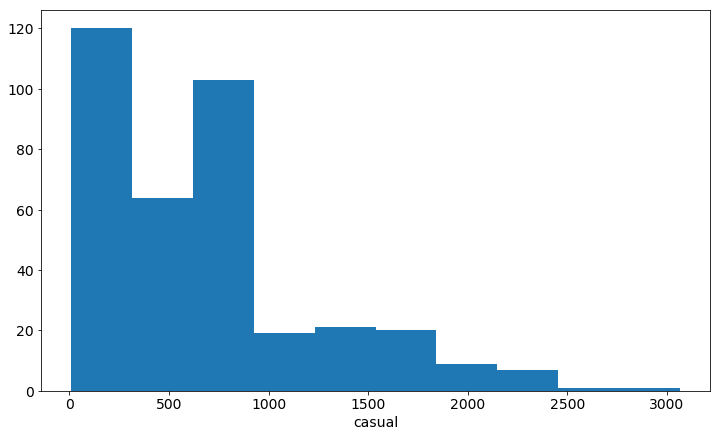

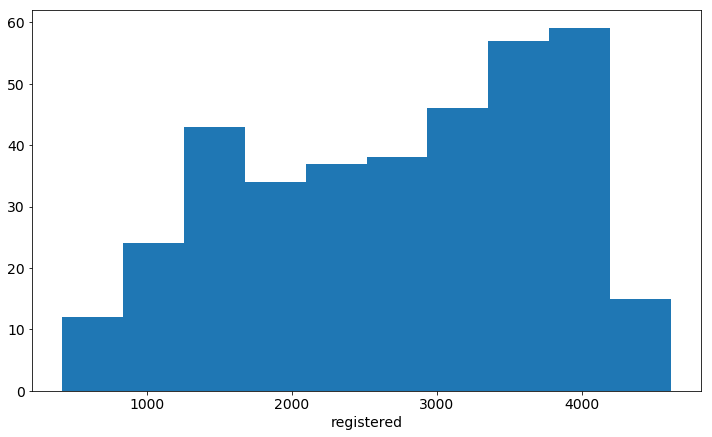

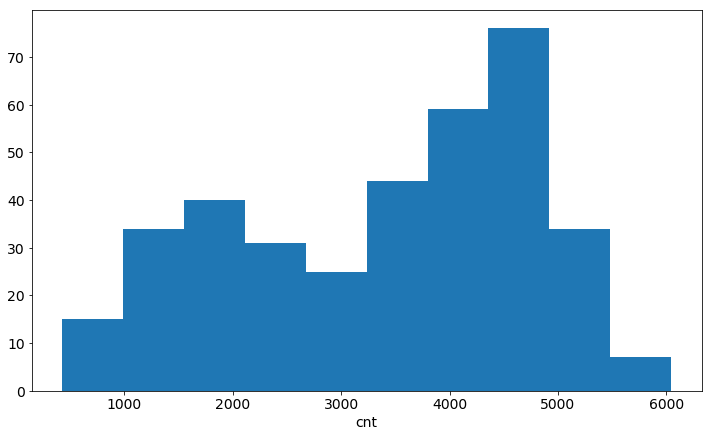

In [151]:
# 特征名
data_cols = data.columns

for col in data_cols.drop(["dteday", "instant"]):
    plt.hist(data[col])   #这三个的直方图无意义
    plt.xlabel(col)
    plt.show()

## target与X

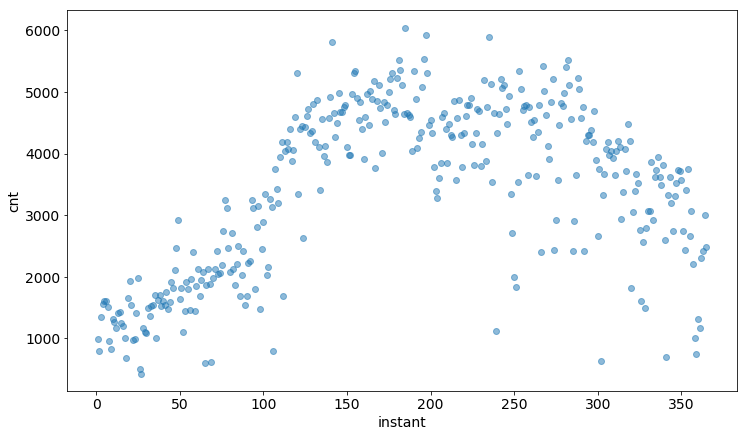

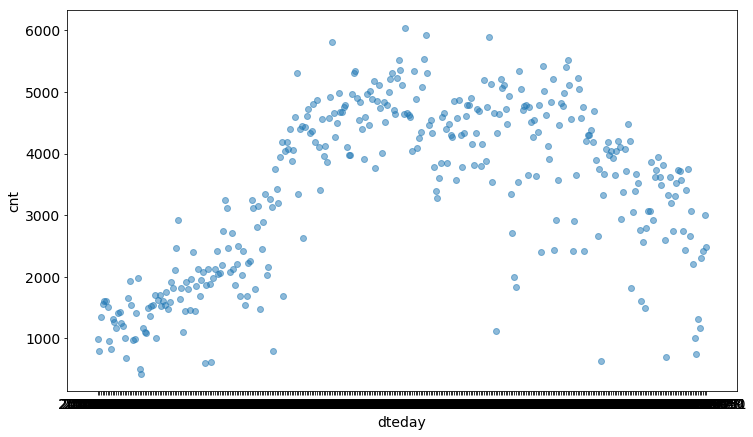

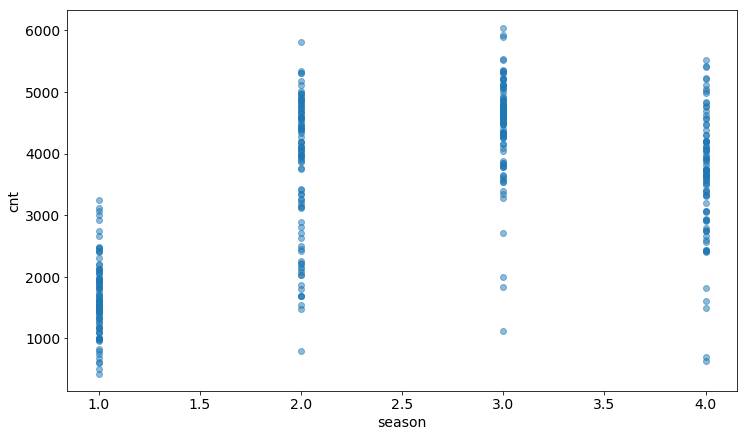

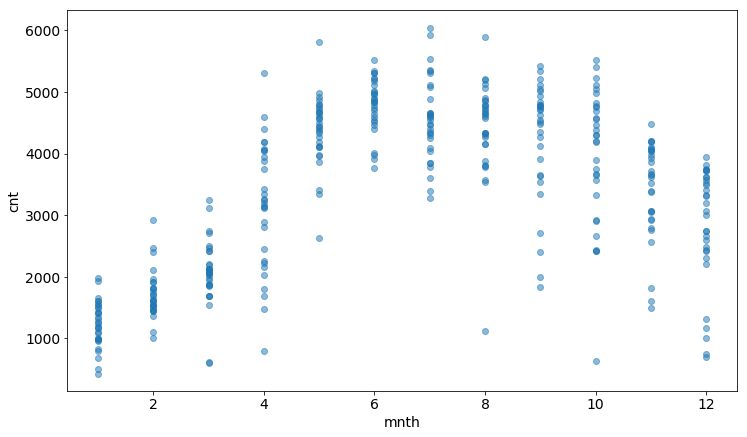

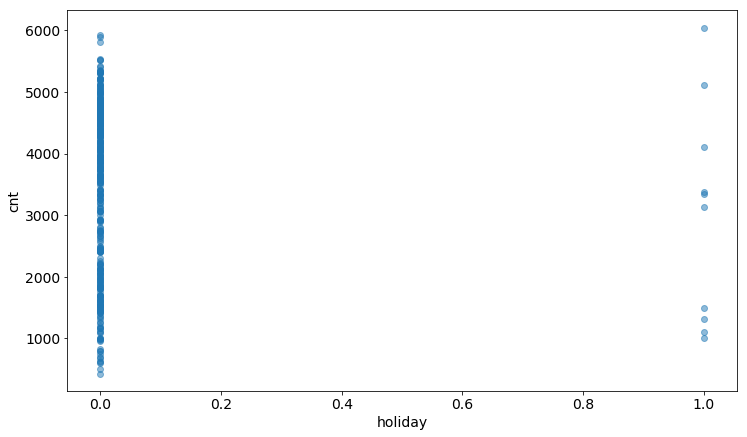

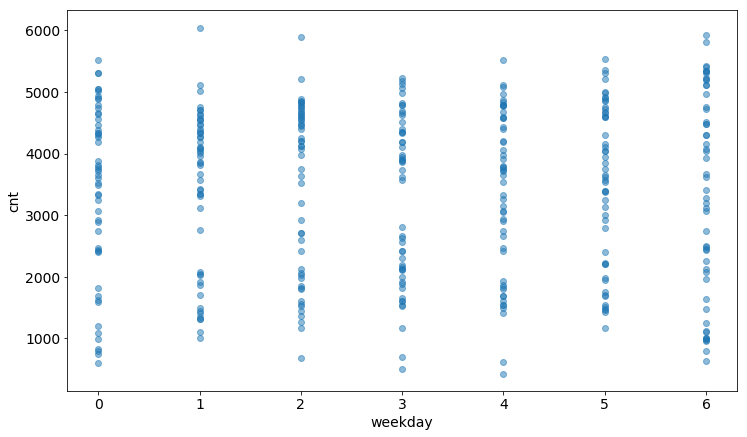

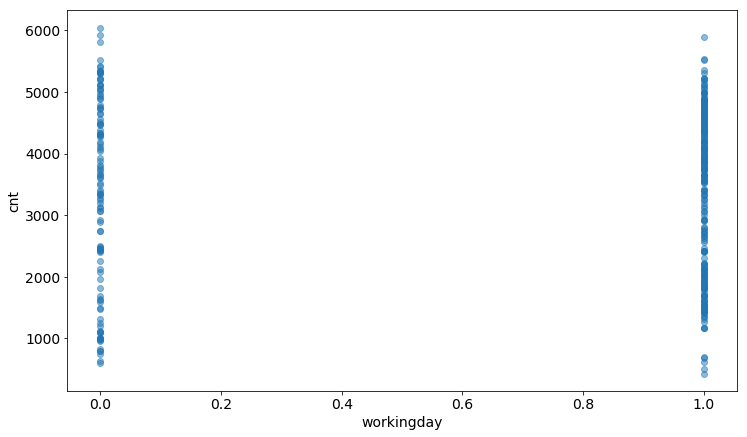

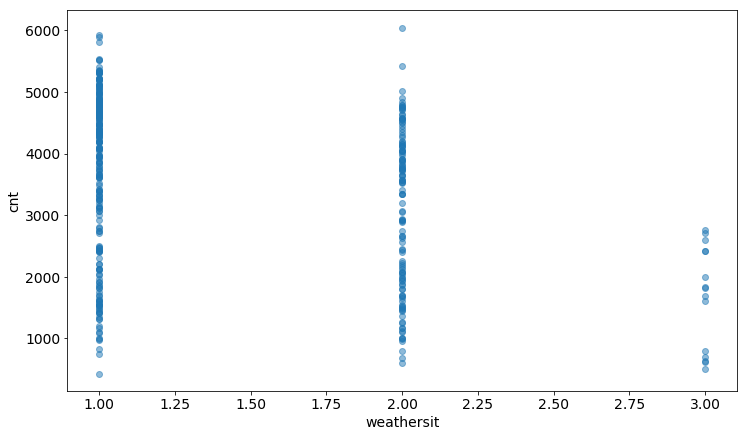

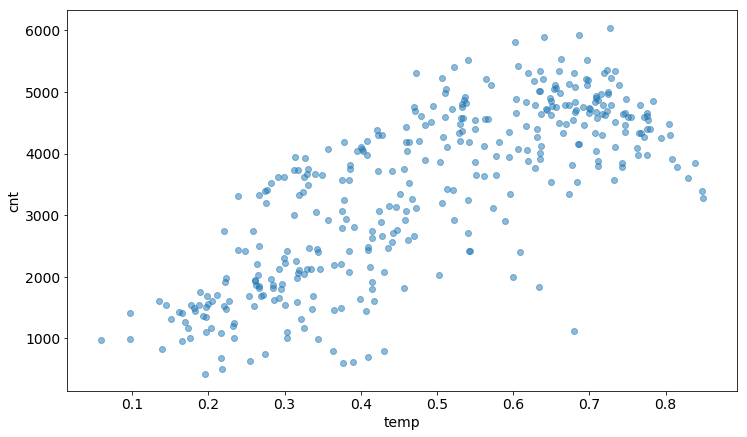

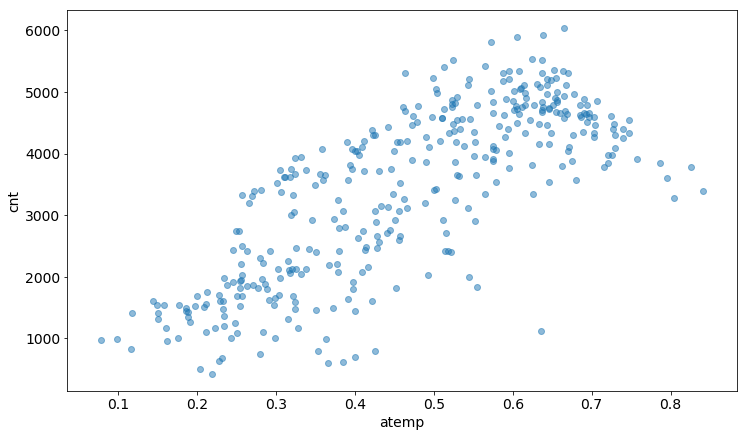

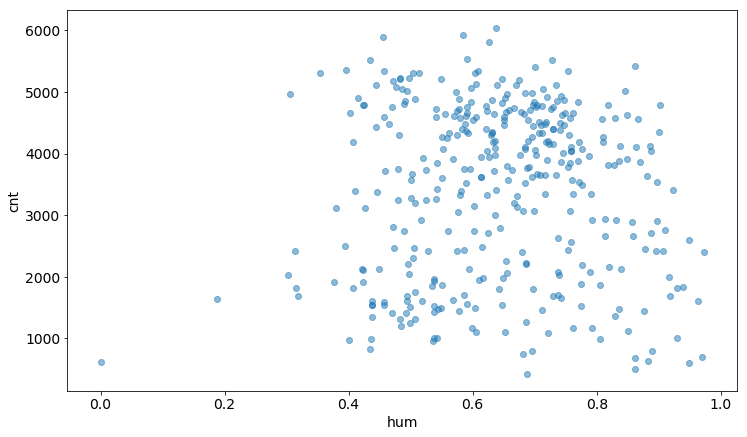

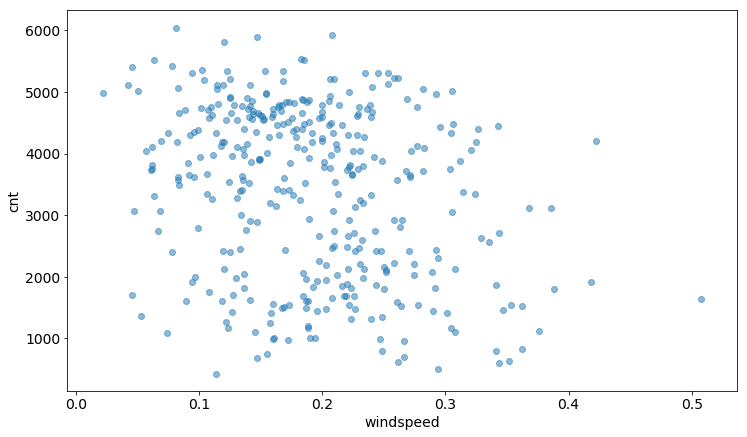

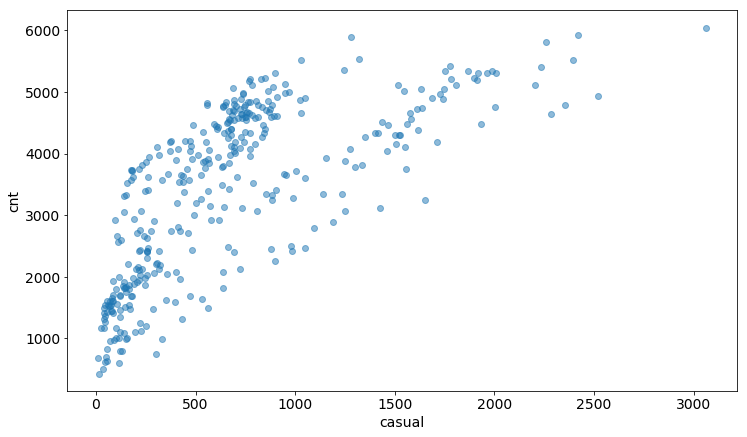

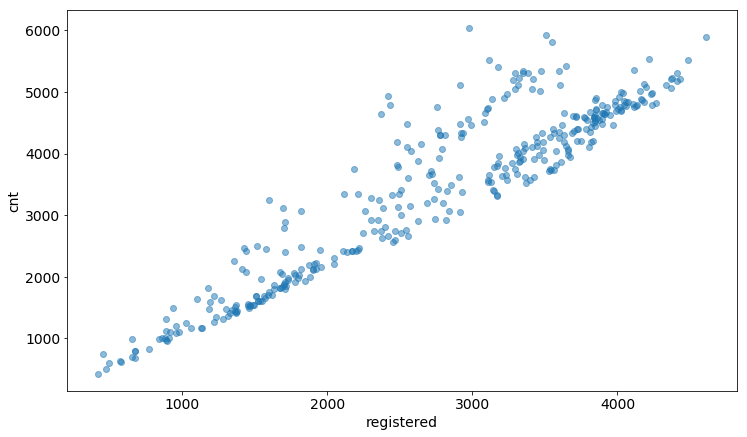

In [152]:
# 查看其它变量与target之间的关系
target = data["cnt"]
for col in data_cols.drop("cnt"):
    X = data[col]
    plt.scatter(X, target, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("cnt")
    plt.show()

## 相关性

In [153]:
data_corr = data.corr().abs() #相关性矩阵
size = data_corr.shape[1] # for上界
cols = list(data.columns) # 相关性矩阵特征名
threshold = 0.5 # 相关性分界线
data_corr_list = [] # 相关性大小排序list
# 格式为: [相关性大小, 特征名[i],特征名[j]]

for i in range(0, size):
    for j in range(i+1, size): # 对称矩阵,取一半
        data_corr_list.append([data_corr.iloc[i,j], i, j])
# 按相关性大小进行排序
data_corr_list = sorted(data_corr_list,key=lambda x:-x[0])
# 输出相关性大于threshold的特征
for v,i,j in data_corr_list:
    if v > threshold:
        print("%3.3f is %s and %s" % (v,cols[i],cols[j])) 
#       记得加括号(cols[i],cols[j],v)


0.997 is instant and season
0.996 is weathersit and temp
0.929 is casual and registered
0.831 is dteday and season
0.827 is instant and dteday
0.775 is temp and registered
0.771 is weathersit and registered
0.708 is windspeed and registered
0.703 is temp and casual
0.698 is weathersit and casual
0.581 is workingday and atemp
0.581 is temp and windspeed
0.581 is weathersit and windspeed
0.573 is dteday and casual
0.542 is dteday and registered
0.541 is weekday and windspeed


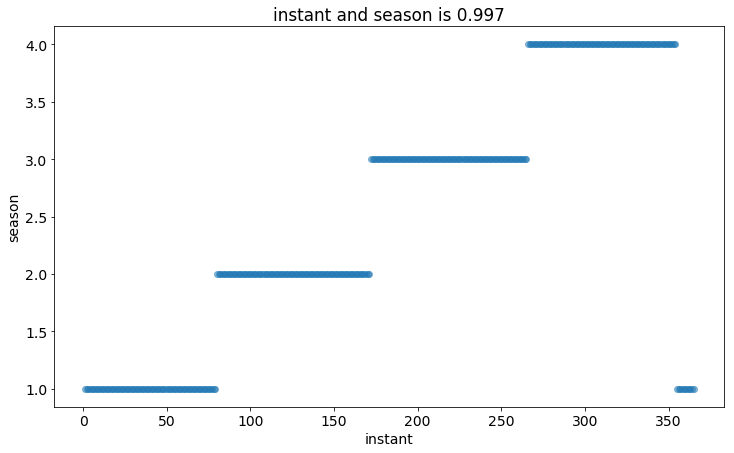

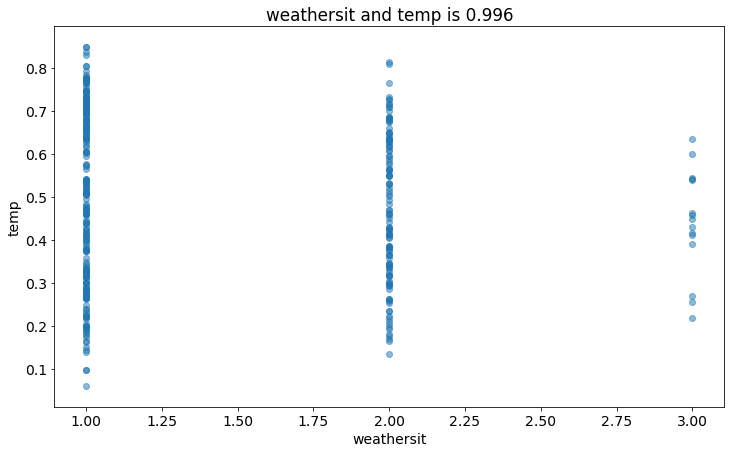

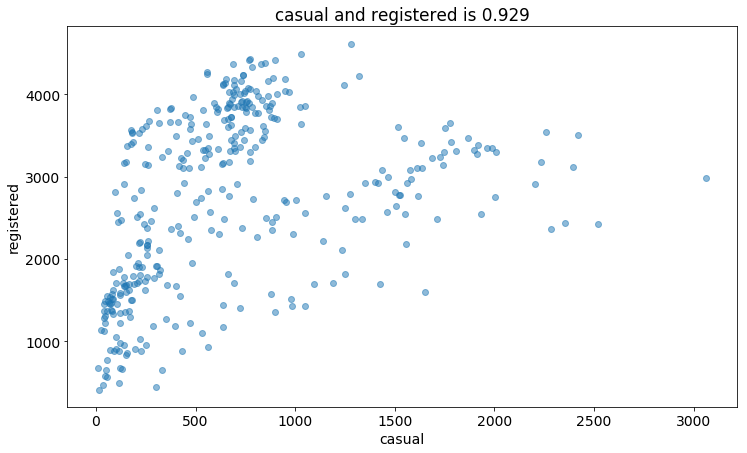

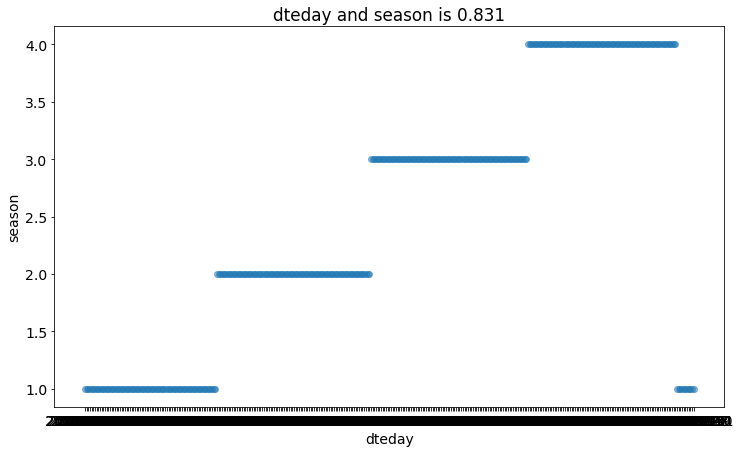

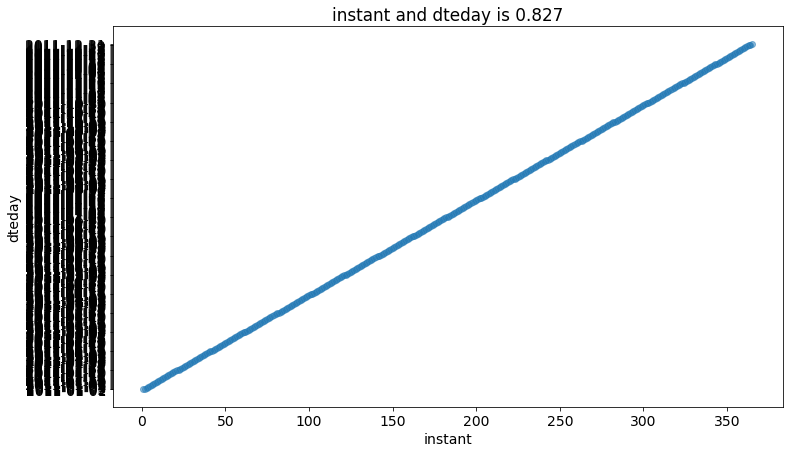

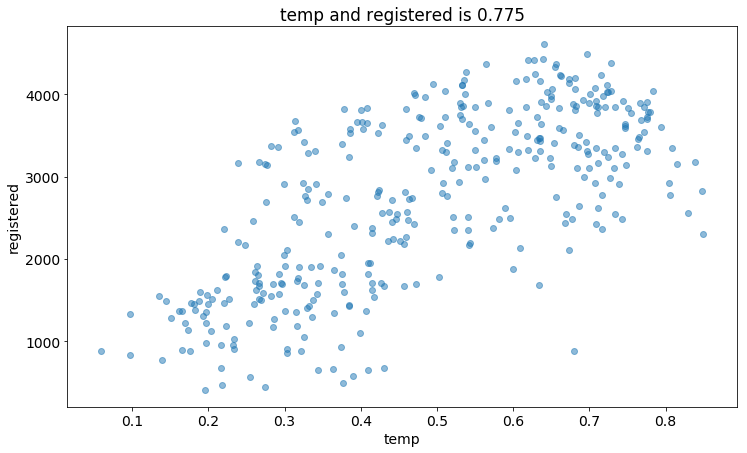

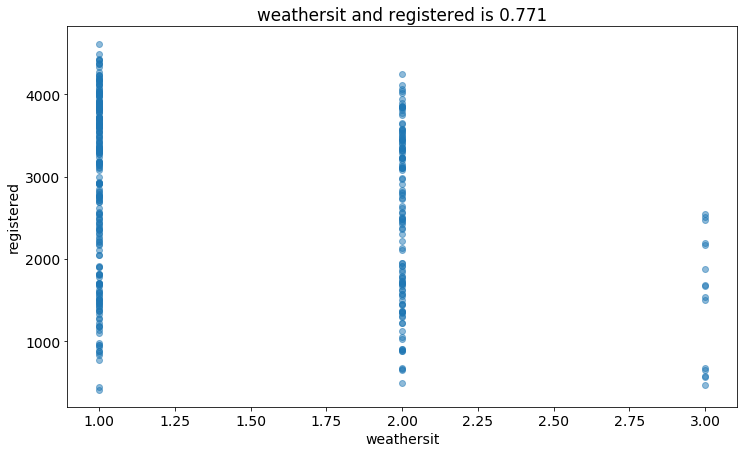

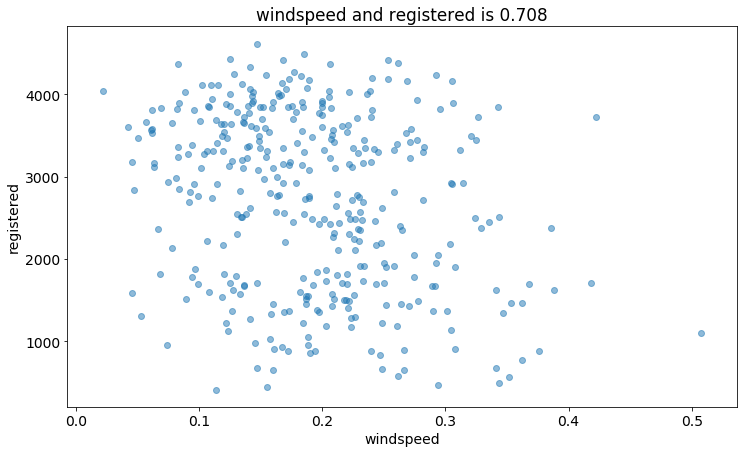

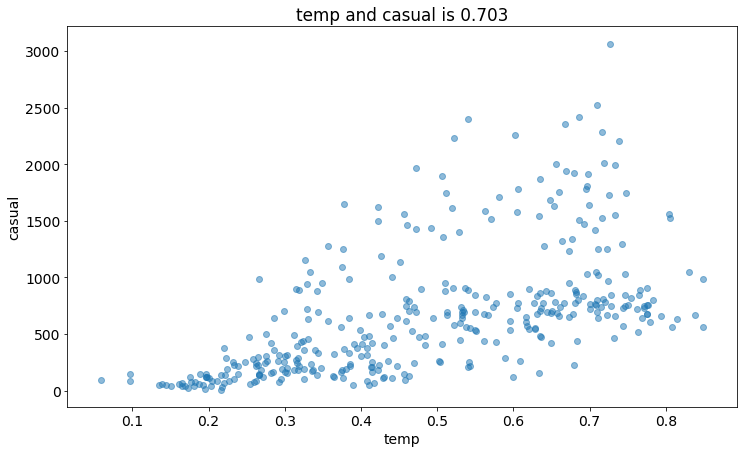

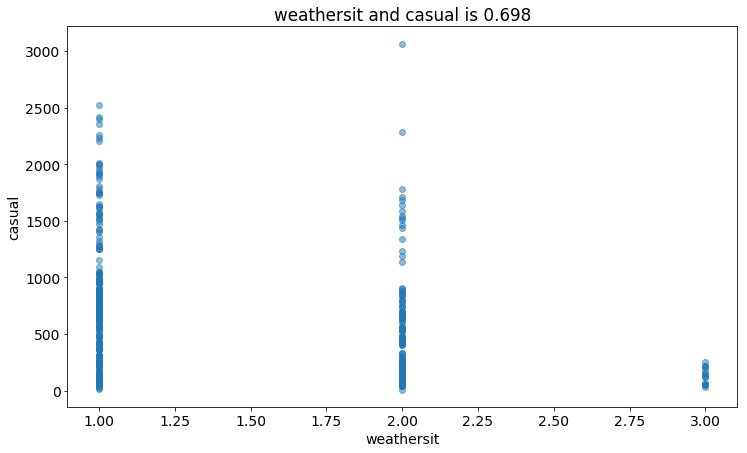

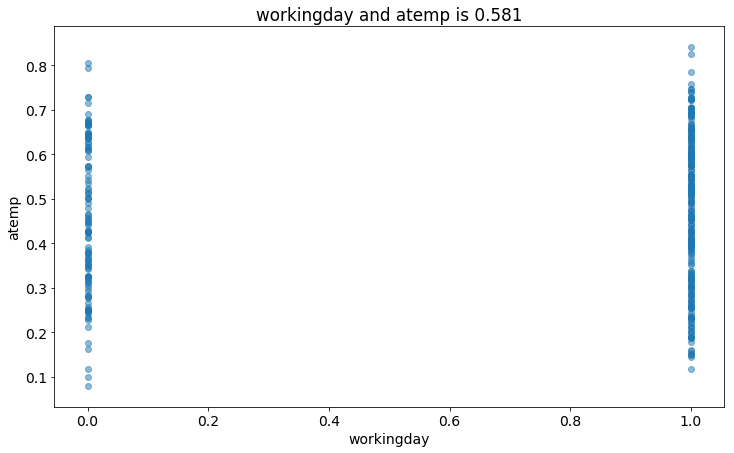

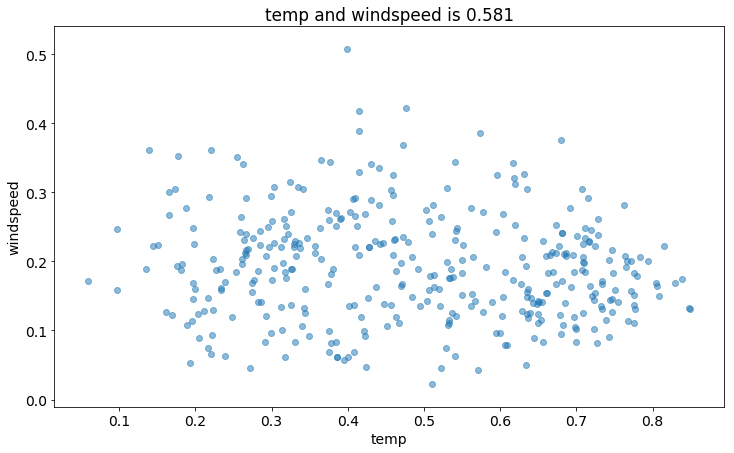

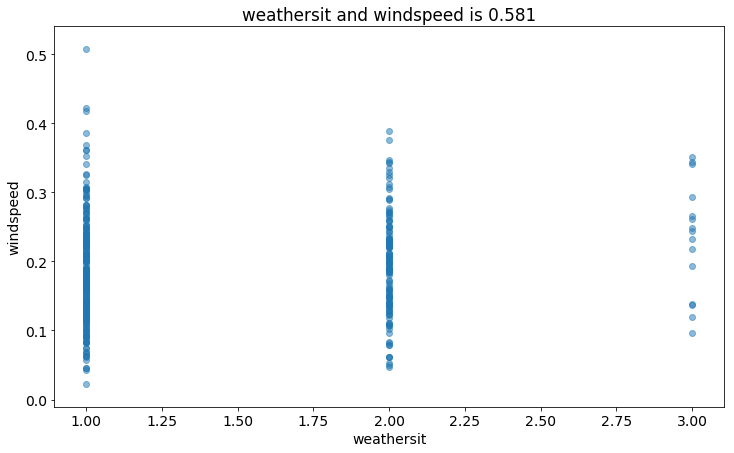

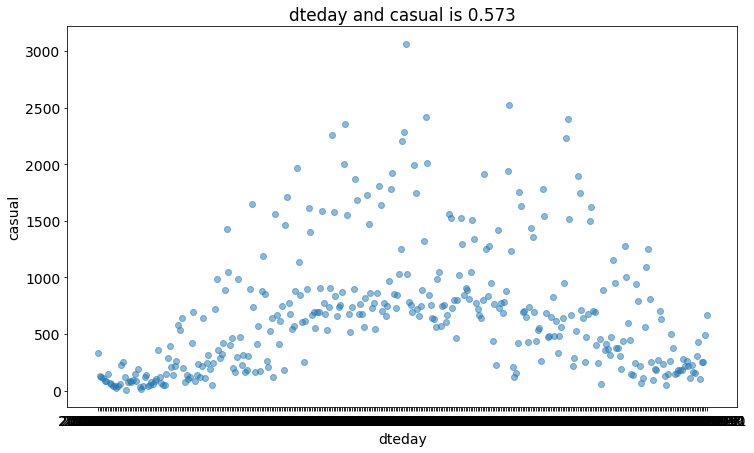

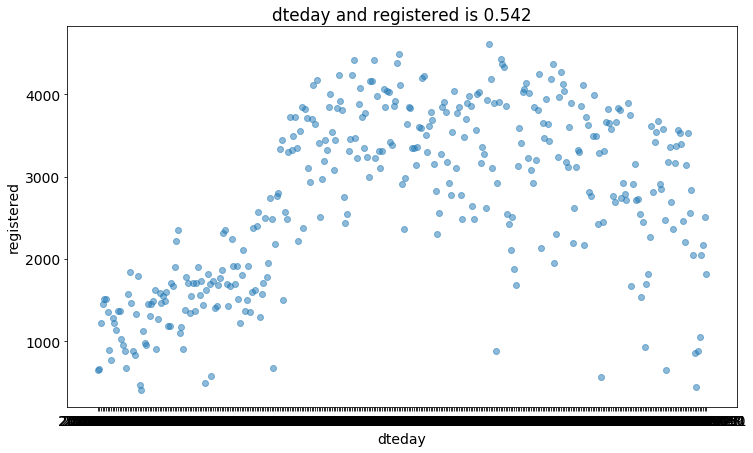

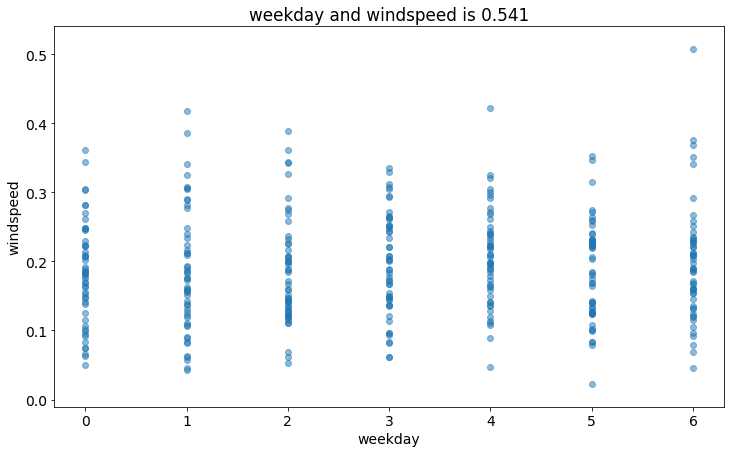

In [154]:
# 相关性大于threshold 特征之间的散点图
for v,i,j in data_corr_list:
    if v > threshold:
        plt.scatter(data[cols[i]], data[cols[j]], alpha=0.5)
        plt.xlabel(cols[i])
        plt.ylabel(cols[j])
        plt.title("%s and %s is %3.3f" % (cols[i],cols[j],v)) 
        plt.show()  

## 新特征
weathersit_div_temp, temp_div_atemp, hum_mul_wind, temp_mul_temp, atemp_mul_atemp

In [155]:
test

,instant,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
365,366,2012-01-01,1,1,0,0,0,1,0.370,0.376,0.693,0.192,686,1608,2294
366,367,2012-01-02,1,1,1,1,0,1,0.273,0.252,0.381,0.330,244,1707,1951
367,368,2012-01-03,1,1,0,2,1,1,0.150,0.126,0.441,0.366,89,2147,2236
368,369,2012-01-04,1,1,0,3,1,2,0.107,0.119,0.415,0.185,95,2273,2368
369,370,2012-01-05,1,1,0,4,1,1,0.266,0.278,0.524,0.130,140,3132,3272
370,371,2012-01-06,1,1,0,5,1,1,0.334,0.340,0.542,0.168,307,3791,4098
371,372,2012-01-07,1,1,0,6,0,1,0.393,0.391,0.532,0.175,1070,3451,4521
372,373,2012-01-08,1,1,0,0,0,1,0.338,0.340,0.465,0.192,599,2826,3425
373,374,2012-01-09,1,1,0,1,1,2,0.224,0.247,0.702,0.099,106,2270,2376
374,375,2012-01-10,1,1,0,2,1,1,0.309,0.319,0.647,0.188,173,3425,3598


In [156]:
# 新特征组成的dict
new_features = {"temp_div_atemp": data.temp.values/data.atemp.values,
               "hum_mul_windspeed":data.hum.values*data.windspeed.values,
               "temp_mul_temp":data.temp.values**2,
               "atemp_mul_atemp":data.atemp.values**2,
               "weathersit_div_temp":data.weathersit.values/data.temp.values}
#new_features.join(data.temp.values/data.atemp.values)
new_features_test =  {"temp_div_atemp": test.temp.values/test.atemp.values
                      , "hum_mul_windspeed":test.hum.values*test.windspeed.values
                      , "temp_mul_temp":test.temp.values**2
                      , "atemp_mul_atemp":test.atemp.values**2
                      ,"weathersit_div_temp":test.weathersit.values/test.temp.values}

new_features = pd.DataFrame(new_features)
new_features_test = pd.DataFrame(new_features_test)


In [157]:
# 添加新特征到data, 一定要注意索引,
# new_features索引是range(new_features[0])
# 如果data删除一些值,索引就会不连续添加时便会出现nan

data = data.join(new_features)

# 添加之前重新定义索引
test = test.reset_index(drop = True)
# test的索引是range(data.shape[0], data.shape[0]+test.shape[0])
test = test.join(new_features_test)

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 20 columns):
instant                365 non-null int64
dteday                 365 non-null object
season                 365 non-null int64
mnth                   365 non-null int64
holiday                365 non-null int64
weekday                365 non-null int64
workingday             365 non-null int64
weathersit             365 non-null int64
temp                   365 non-null float64
atemp                  365 non-null float64
hum                    365 non-null float64
windspeed              365 non-null float64
casual                 365 non-null int64
registered             365 non-null int64
cnt                    365 non-null int64
atemp_mul_atemp        365 non-null float64
hum_mul_windspeed      365 non-null float64
temp_div_atemp         365 non-null float64
temp_mul_temp          365 non-null float64
weathersit_div_temp    365 non-null float64
dtypes: float64(9), int64(10), objec

In [159]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 20 columns):
instant                366 non-null int64
dteday                 366 non-null object
season                 366 non-null int64
mnth                   366 non-null int64
holiday                366 non-null int64
weekday                366 non-null int64
workingday             366 non-null int64
weathersit             366 non-null int64
temp                   366 non-null float64
atemp                  366 non-null float64
hum                    366 non-null float64
windspeed              366 non-null float64
casual                 366 non-null int64
registered             366 non-null int64
cnt                    366 non-null int64
atemp_mul_atemp        366 non-null float64
hum_mul_windspeed      366 non-null float64
temp_div_atemp         366 non-null float64
temp_mul_temp          366 non-null float64
weathersit_div_temp    366 non-null float64
dtypes: float64(9), int64(10), objec

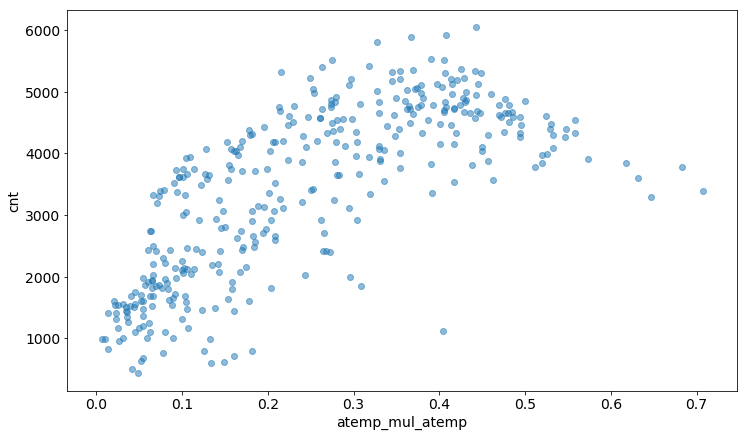

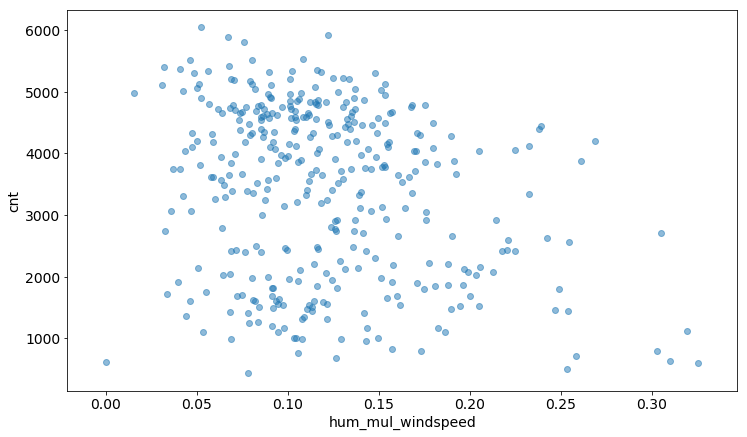

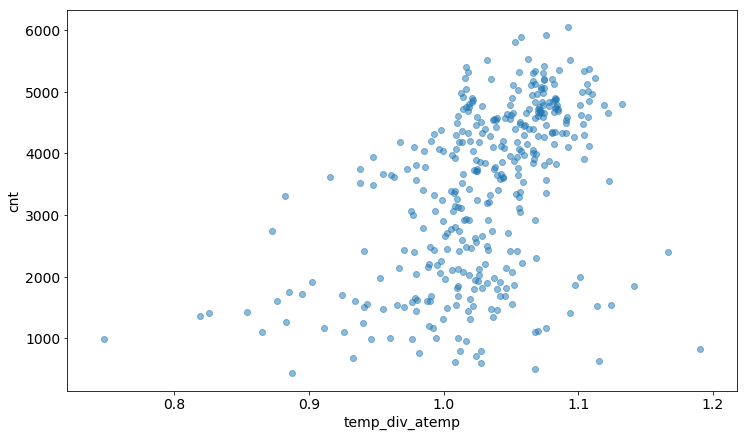

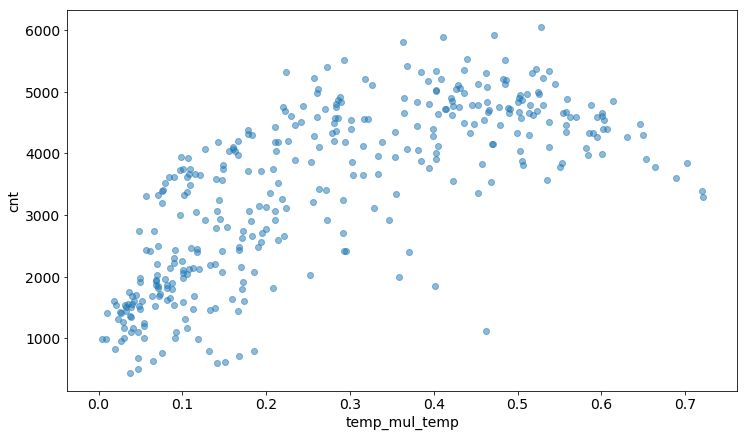

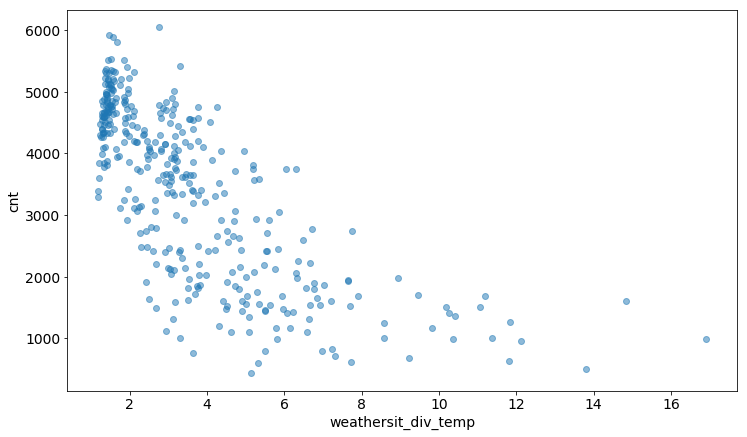

In [160]:
# 查看new_features与target的相关性
for col in new_features:
    x = data[col]
    plt.scatter(x, target, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("cnt")
    plt.show()

删除outliner
temp_div_atemp<1.5

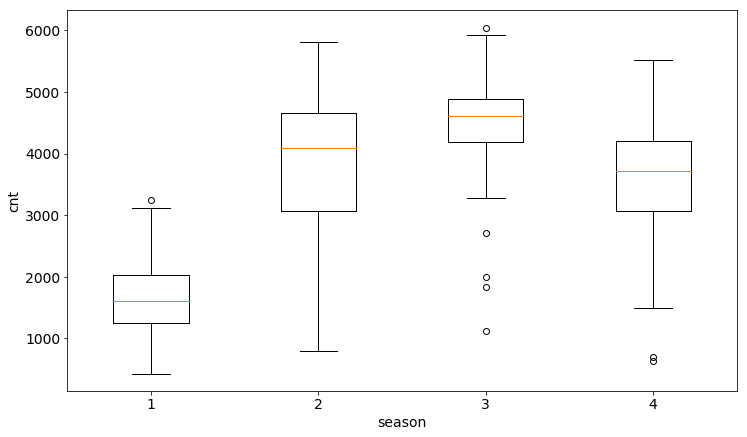

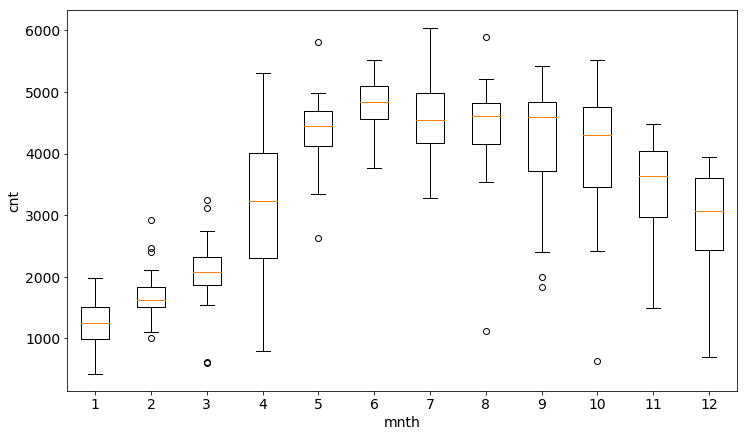

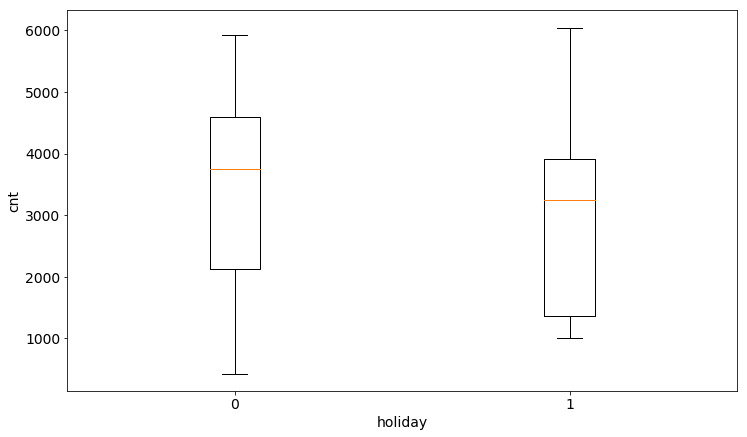

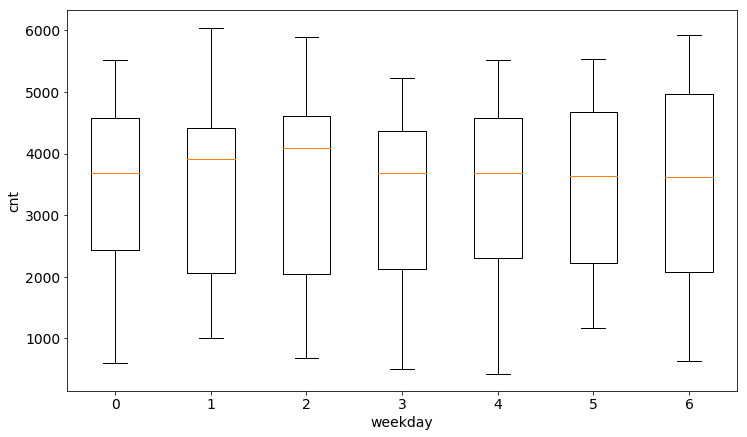

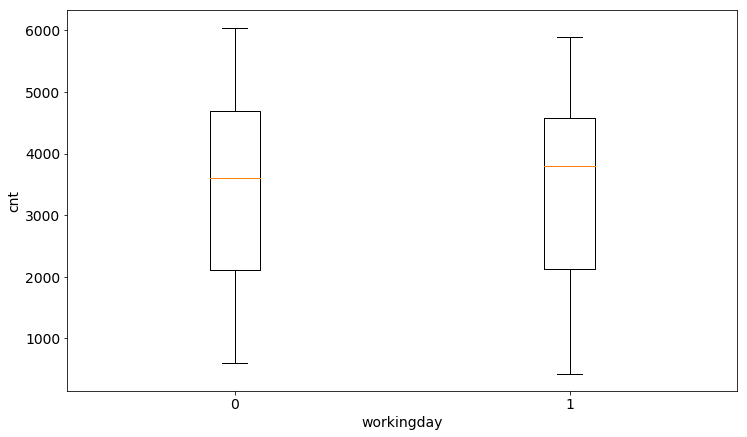

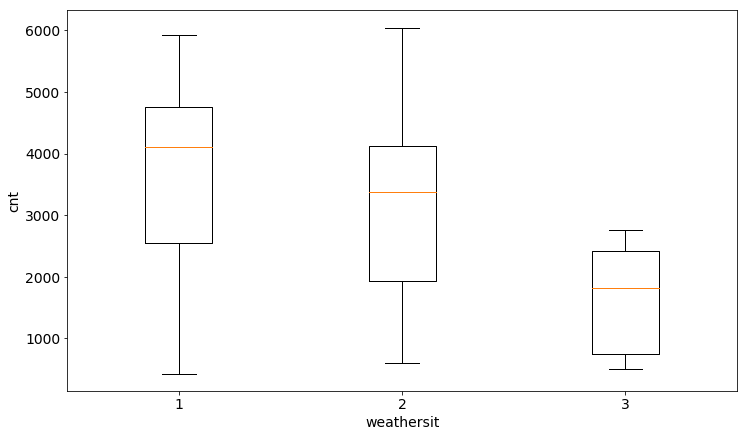

In [161]:
# 查看离散型数据与target的箱型图
descrete = ["season", "mnth", "holiday", "weekday", 
            "workingday", "weathersit"]
for col in descrete:
    x = set(data[col]) # labels, 用set()去重
    y = [] #labeks对应数据集
    for v in x:
        y.append(list(target[data[col]==v]))
    plt.boxplot(y, labels=x)
    plt.xlabel(col)
    plt.ylabel("cnt")
    plt.show()


离群点
(data.season==1) & (data.cnt>7000)
(data.season==4) & (data.cnt<100)
(data.yr==1) & (data.cnt<100)
data[(data.yr==1)].cnt.sort_values() 
具体查看cnt的值,图上看不清楚

## 离群点

In [162]:
# 离群点对应的instant
outliner =      list(data[(data.season==3) & (data.cnt<3000)].instant)
outliner.extend(list(data[(data.season==4) & (data.cnt<1000)].instant))
outliner.extend(list(data[data.temp_div_atemp>1.5].instant))

outliner = set(outliner) #去除重复
print("原始数据",data.shape)
for v in outliner:
    data = data[data.instant!=v]
print("删除之后",data.shape)


原始数据 (365, 20)
删除之后 (359, 20)


In [163]:
print("test.shape",test.shape)
print("data.shape",data.shape)

test.shape (366, 20)
data.shape (359, 20)


## onehot

In [164]:
data = pd.get_dummies(data, columns=["season", "mnth", "holiday"
                              , "weekday", "workingday", "weathersit"])
test = pd.get_dummies(test, columns=["season", "mnth", "holiday"
                              , "weekday", "workingday", "weathersit"])
data

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,atemp_mul_atemp,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,1,2011-01-01,0.344,0.364,0.806,0.160,331,654,985,0.132,...,0,0,0,0,1,1,0,0,1,0
1,2,2011-01-02,0.363,0.354,0.696,0.249,131,670,801,0.125,...,0,0,0,0,0,1,0,0,1,0
2,3,2011-01-03,0.196,0.189,0.437,0.248,120,1229,1349,0.036,...,0,0,0,0,0,0,1,1,0,0
3,4,2011-01-04,0.200,0.212,0.590,0.160,108,1454,1562,0.045,...,1,0,0,0,0,0,1,1,0,0
4,5,2011-01-05,0.227,0.229,0.437,0.187,82,1518,1600,0.053,...,0,1,0,0,0,0,1,1,0,0
5,6,2011-01-06,0.204,0.233,0.518,0.090,88,1518,1606,0.054,...,0,0,1,0,0,0,1,1,0,0
6,7,2011-01-07,0.197,0.209,0.499,0.169,148,1362,1510,0.044,...,0,0,0,1,0,0,1,0,1,0
7,8,2011-01-08,0.165,0.162,0.536,0.267,68,891,959,0.026,...,0,0,0,0,1,1,0,0,1,0
8,9,2011-01-09,0.138,0.116,0.434,0.362,54,768,822,0.013,...,0,0,0,0,0,1,0,1,0,0
9,10,2011-01-10,0.151,0.151,0.483,0.223,41,1280,1321,0.023,...,0,0,0,0,0,0,1,1,0,0


In [165]:
test

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,atemp_mul_atemp,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,366,2012-01-01,0.370,0.376,0.693,0.192,686,1608,2294,0.141,...,0,0,0,0,0,1,0,1,0,0
1,367,2012-01-02,0.273,0.252,0.381,0.330,244,1707,1951,0.064,...,0,0,0,0,0,1,0,1,0,0
2,368,2012-01-03,0.150,0.126,0.441,0.366,89,2147,2236,0.016,...,1,0,0,0,0,0,1,1,0,0
3,369,2012-01-04,0.107,0.119,0.415,0.185,95,2273,2368,0.014,...,0,1,0,0,0,0,1,0,1,0
4,370,2012-01-05,0.266,0.278,0.524,0.130,140,3132,3272,0.078,...,0,0,1,0,0,0,1,1,0,0
5,371,2012-01-06,0.334,0.340,0.542,0.168,307,3791,4098,0.116,...,0,0,0,1,0,0,1,1,0,0
6,372,2012-01-07,0.393,0.391,0.532,0.175,1070,3451,4521,0.153,...,0,0,0,0,1,1,0,1,0,0
7,373,2012-01-08,0.338,0.340,0.465,0.192,599,2826,3425,0.116,...,0,0,0,0,0,1,0,1,0,0
8,374,2012-01-09,0.224,0.247,0.702,0.099,106,2270,2376,0.061,...,0,0,0,0,0,0,1,0,1,0
9,375,2012-01-10,0.309,0.319,0.647,0.188,173,3425,3598,0.102,...,1,0,0,0,0,0,1,1,0,0


In [166]:
# 保存特征工程后的数据
data.to_csv("../data/Bike-Sharing-Dataset/train_FE.csv"
            , index=False)
test.to_csv("../data/Bike-Sharing-Dataset/test.csv"
            , index=False)
# 保存test数据

# 数据预处理

## 工具包及数据

In [167]:
# 导入必要工具包
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
# 导入评分工具
from sklearn.metrics import mean_squared_error

In [168]:
# 导入特征工程后的数据
data_FE = pd.read_csv("../data/Bike-Sharing-Dataset/train_FE.csv")
test = pd.read_csv("../data/Bike-Sharing-Dataset/test.csv")
data_FE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 44 columns):
instant                359 non-null int64
dteday                 359 non-null object
temp                   359 non-null float64
atemp                  359 non-null float64
hum                    359 non-null float64
windspeed              359 non-null float64
casual                 359 non-null int64
registered             359 non-null int64
cnt                    359 non-null int64
atemp_mul_atemp        359 non-null float64
hum_mul_windspeed      359 non-null float64
temp_div_atemp         359 non-null float64
temp_mul_temp          359 non-null float64
weathersit_div_temp    359 non-null float64
season_1               359 non-null int64
season_2               359 non-null int64
season_3               359 non-null int64
season_4               359 non-null int64
mnth_1                 359 non-null int64
mnth_2                 359 non-null int64
mnth_3                 359 non-null 

In [169]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 44 columns):
instant                366 non-null int64
dteday                 366 non-null object
temp                   366 non-null float64
atemp                  366 non-null float64
hum                    366 non-null float64
windspeed              366 non-null float64
casual                 366 non-null int64
registered             366 non-null int64
cnt                    366 non-null int64
atemp_mul_atemp        366 non-null float64
hum_mul_windspeed      366 non-null float64
temp_div_atemp         366 non-null float64
temp_mul_temp          366 non-null float64
weathersit_div_temp    366 non-null float64
season_1               366 non-null int64
season_2               366 non-null int64
season_3               366 non-null int64
season_4               366 non-null int64
mnth_1                 366 non-null int64
mnth_2                 366 non-null int64
mnth_3                 366 non-null 

## 分离数据

In [170]:
# 分出 X, y
X_data = data_FE.drop(["dteday","cnt","casual","registered"], axis=1)
y_data = data_FE["cnt"]

test_X = test.drop(["dteday","cnt","casual","registered"], axis=1)
test_y = test["cnt"]

In [171]:
#分割训练数据与测试数据
from sklearn.model_selection import train_test_split

# 随机采样25%的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data
                                                    , random_state=33
                                                    , test_size=0.2)

## 标准化数据

In [172]:
# 标准化X
from sklearn.preprocessing import StandardScaler

ss_X = StandardScaler()
ss_y = StandardScaler()


X_train = ss_X.fit_transform(X_train)
X_test = ss_X.fit_transform(X_test)
test_X = ss_X.fit_transform(test_X)

y_train = ss_y.fit_transform(y_train.reshape(-1, 1))
y_test  = ss_y.fit_transform(y_test.reshape(-1, 1))
test_y  = ss_y.fit_transform(test_y.reshape(-1, 1))

I:\Anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':
I:\Anaconda2\envs\python3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
I:\Anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]
I:\Anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


# 模型选择

## LinearRegression

In [173]:

# 使用默认配置初始化
lr = LinearRegression()

# 训练模型参数
lr.fit(X_train, y_train)

# 预测，下面计算score会自动调用predict
lr_y_predict_X_test = lr.predict(X_test)
lr_y_predict_X_train = lr.predict(X_train)
lr_y_predict_test_X = lr.predict(test_X)
#显示特征的回归系数
lr.coef_

array([[ -3.83508861e-01,   3.41696980e+00,  -6.70518617e-01,
         -1.79348400e-01,  -2.52060939e-01,   1.22513474e-01,
          1.28047244e-01,   1.90185052e-02,  -2.26562161e+00,
          3.30474616e-01,  -2.26492096e-01,  -9.68755300e-02,
          1.26830321e-01,   2.08138181e-01,  -1.94108041e-01,
         -1.96715826e-01,  -1.77000953e-01,  -6.41759698e-02,
          1.08244190e-01,   1.29222285e-01,   5.20688068e-02,
          4.95188901e-02,   8.64274260e-02,   4.48074965e-02,
          5.89880417e-02,   1.18634868e-01,   6.39114625e-03,
         -6.39114625e-03,  -2.95209014e-02,  -1.89058972e-02,
          2.37244809e-03,   4.09314268e-03,   1.03976595e-02,
          9.42237149e-03,   2.49254980e-02,  -7.12830290e-03,
          7.12830290e-03,   1.98444167e-01,  -1.11445631e-01,
         -2.59666929e-01]])

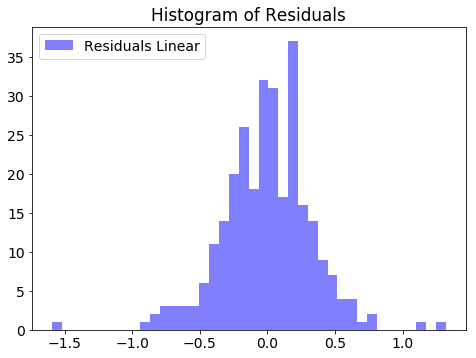

In [174]:
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(y_train - lr_y_predict_train,bins=40, label='Residuals Linear', color='b', alpha=.5); 
ax.set_title("Histogram of Residuals") 
ax.legend(loc='best');

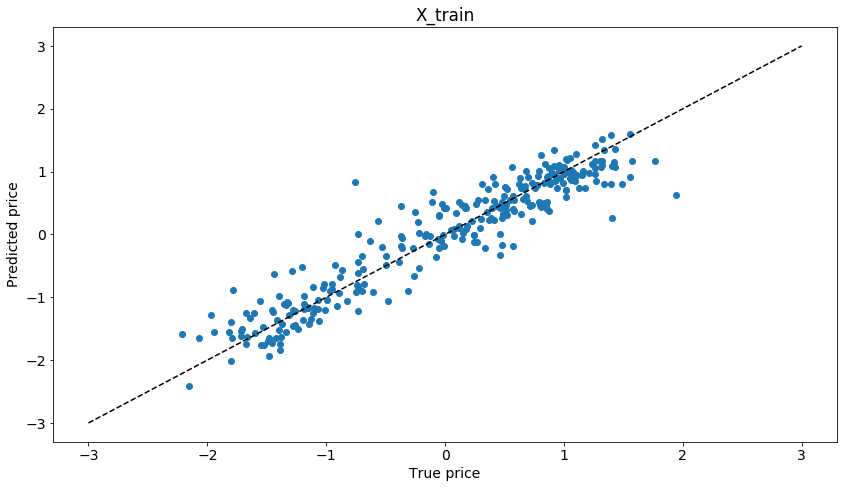

In [175]:
plt.scatter(y_train, lr_y_predict_X_train)
plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('X_train')
plt.tight_layout()

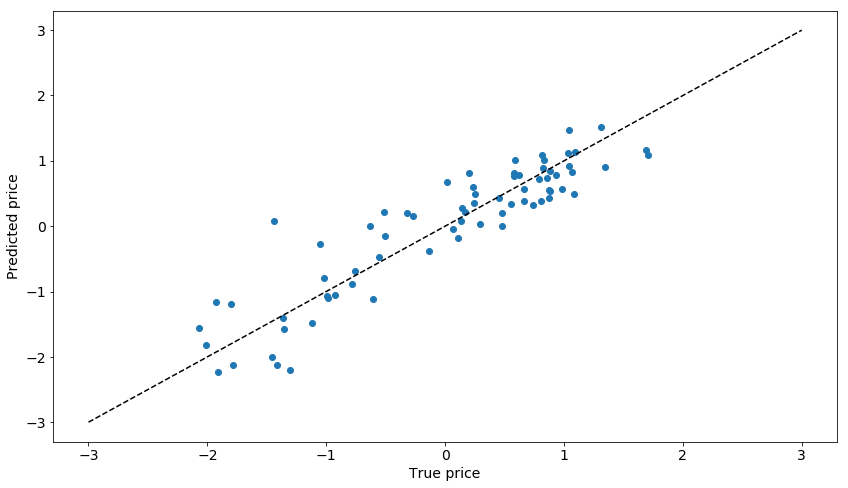

In [176]:
plt.scatter(y_test, lr_y_predict_X_test)
plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()

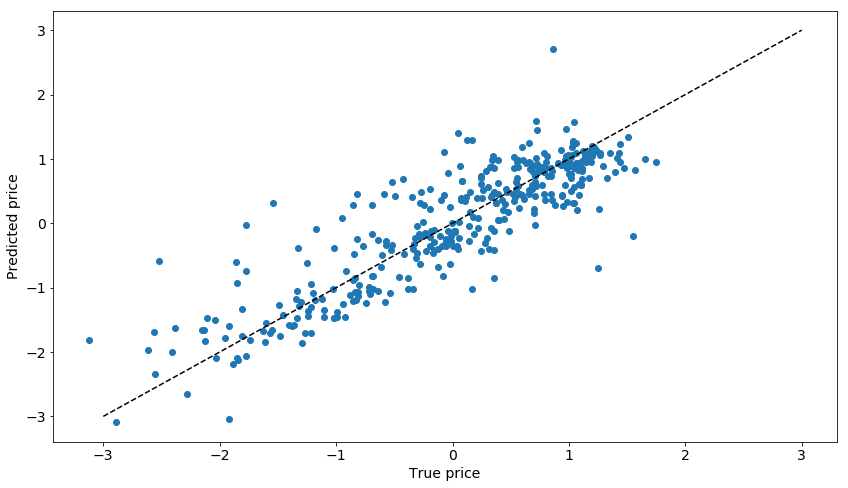

In [177]:
plt.scatter(test_y, lr_y_predict_test_X)
plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()

In [178]:
print("The lr on train is %f" % lr.score(X_train, y_train))
print("The lr on test is %f" % lr.score(X_test, y_test))
print("The lr on 2012 is %f" % lr.score(test_X, test_y))

# print(((y_test - lr_y_predict) **2 ).sum())
# print(((y_test - y_test.mean()) **2).sum())

The lr on train is 0.890301
The lr on test is 0.824370
The lr on 2012 is 0.745627


默认的线性回归特别差,尝试其它线性回归模型 

## SGDRegressor

In [179]:
# 线性模型，随机梯度下降优化模型参数
# 随机梯度下降一般在大数据集上应用，其实本项目不适合用
from sklearn.linear_model import SGDRegressor

# 使用默认配置初始化线
sgdr = SGDRegressor(max_iter=1000)

# 训练：参数估计
sgdr.fit(X_train, y_train)

# 预测
#sgdr_y_predict = sgdr.predict(X_test)

sgdr.coef_

I:\Anaconda2\envs\python3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ -1.35544267e-01,   8.62740171e-01,   9.34268621e-01,
        -1.41540247e-01,  -1.93187092e-01,  -6.73417089e-01,
         7.96986935e-02,   9.53063581e-02,  -6.62622757e-01,
         2.16719900e-01,  -2.15738617e-01,  -9.98926464e-02,
         1.20345991e-01,   2.06648197e-01,  -1.33512377e-01,
        -1.33893076e-01,  -1.15875249e-01,   4.53859185e-03,
         1.63180970e-01,   1.45159783e-01,   2.44739257e-02,
         2.40032568e-02,   5.87201286e-02,  -2.56413464e-03,
        -2.27375446e-02,  -8.43544909e-03,   6.43719560e-03,
        -6.43719560e-03,  -3.29580215e-02,  -1.53799119e-02,
         4.27124606e-04,   2.65056311e-03,   8.09522101e-03,
         1.07590541e-02,   2.91813529e-02,  -6.71439185e-03,
         6.71439185e-03,   1.63588266e-01,  -8.72871262e-02,
        -2.27160364e-01])

In [180]:
f.tight_layout() 
ax.hist(y_train - lr_y_predict_train,bins=40, label='Residuals Linear', color='b', alpha=.5); 
ax.set_title("Histogram of Residuals") 
ax.legend(loc='best');

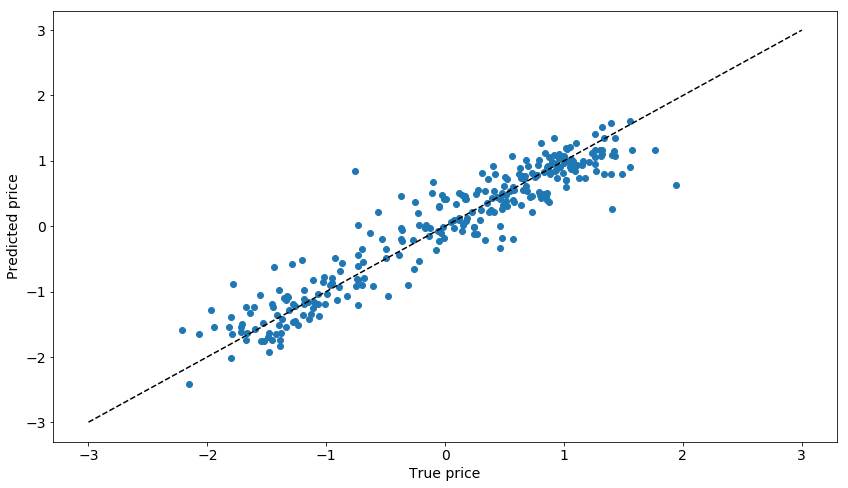

In [181]:
plt.scatter(y_train, lr_y_predict_train)
plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()

In [182]:
print("The lr on train is %f" % sgdr.score(X_train, y_train))
print("The lr on test is %f" % sgdr.score(X_test, y_test))
print("The lr on 2012 is %f" % sgdr.score(test_X, test_y))

The lr on train is 0.885746
The lr on test is 0.833104
The lr on 2012 is 0.740861


## RidgeCV

In [183]:
#岭回归／L2正则
#class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, 
#                                  normalize=False, scoring=None, cv=None, gcv_mode=None, 
#                                  store_cv_values=False)
from sklearn.linear_model import  RidgeCV

#alphas = [0.01, 0.07, 0.09, 0.1, 0.2, 0.3, 1, 10, 100, 1000] alphas=0.2
#alphas  = np.arange(0.1,0.3, 0.01) alphas=0.18
alphas  = np.arange(0.18,0.2, 0.001)
reg = RidgeCV(alphas=alphas, store_cv_values=True)   
reg.fit(X_train, y_train)    

RidgeCV(alphas=array([ 0.18 ,  0.181,  0.182,  0.183,  0.184,  0.185,  0.186,  0.187,
        0.188,  0.189,  0.19 ,  0.191,  0.192,  0.193,  0.194,  0.195,
        0.196,  0.197,  0.198,  0.199,  0.2  ]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

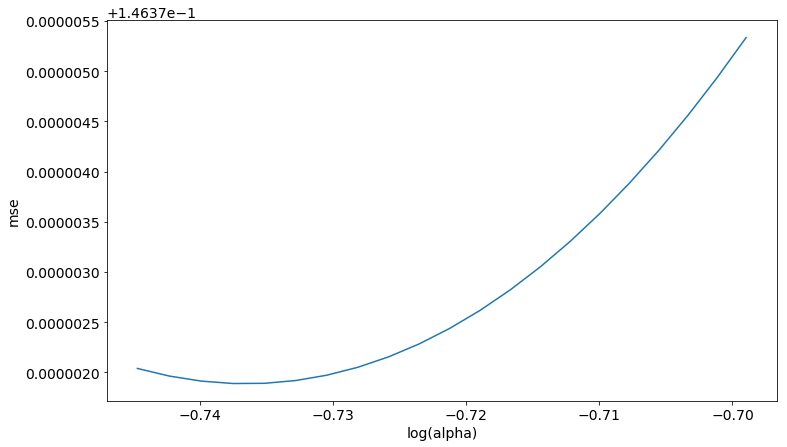

alpha is: 0.183


array([[ -2.80261284e-01,   1.20135362e+00,   1.17502749e+00,
         -1.66556864e-01,  -2.28165879e-01,  -8.47665889e-01,
          1.12449628e-01,   1.07726944e-01,  -9.97355495e-01,
          3.21984466e-01,  -2.21847356e-01,  -9.63142242e-02,
          1.21970519e-01,   2.07667727e-01,  -1.67619923e-01,
         -1.71358885e-01,  -1.52102839e-01,  -3.84885266e-02,
          1.28897004e-01,   1.36811428e-01,   4.38250333e-02,
          4.04329835e-02,   7.82293356e-02,   2.38123200e-02,
          2.32459257e-02,   6.50231589e-02,   6.20014299e-03,
         -6.20014299e-03,  -3.09469217e-02,  -1.72947593e-02,
          1.13849723e-03,   2.53853895e-03,   1.11540229e-02,
          1.00257918e-02,   2.61443664e-02,  -7.27359290e-03,
          7.27359290e-03,   1.94664001e-01,  -1.08809172e-01,
         -2.56188544e-01]])

In [184]:
mse_mean = np.mean(reg.cv_values_, axis = 0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1)) 
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:', reg.alpha_)
reg.coef_

In [185]:
print("The reg on train is %f" % reg.score(X_train, y_train))
print ("The reg on test is %f" % reg.score(X_test, y_test))
print ("The reg on 2012 is %f" % reg.score(test_X, test_y))

The reg on train is 0.889672
The reg on test is 0.829409
The reg on 2012 is 0.754195


## Lasso

In [186]:
#### Lasso／L1正则
# class sklearn.linear_model.LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, 
#                                    normalize=False, precompute=’auto’, max_iter=1000, 
#                                    tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=1,
#                                    positive=False, random_state=None, selection=’cyclic’)
from sklearn.linear_model import LassoCV

#alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10,100] alphas = 0.001
alphas = np.arange(0.0005,0.005,0.0001)

lasso = LassoCV(alphas=alphas)   
lasso.fit(X_train, y_train)       

I:\Anaconda2\envs\python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
I:\Anaconda2\envs\python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
I:\Anaconda2\envs\python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=array([ 0.0005,  0.0006,  0.0007,  0.0008,  0.0009,  0.001 ,  0.0011,
        0.0012,  0.0013,  0.0014,  0.0015,  0.0016,  0.0017,  0.0018,
        0.0019,  0.002 ,  0.0021,  0.0022,  0.0023,  0.0024,  0.0025,
        0.0026,  0.0027,  0.0028,  0.0029,  0.003 ,  0.0031,  0.0032,
        0.0033,  0.0034,  0.0035,  0.0036,  0.0037,  0.0038,  0.0039,
        0.004 ,  0.0041,  0.0042,  0.0043,  0.0044,  0.0045,  0.0046,
        0.0047,  0.0048,  0.0049]),
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

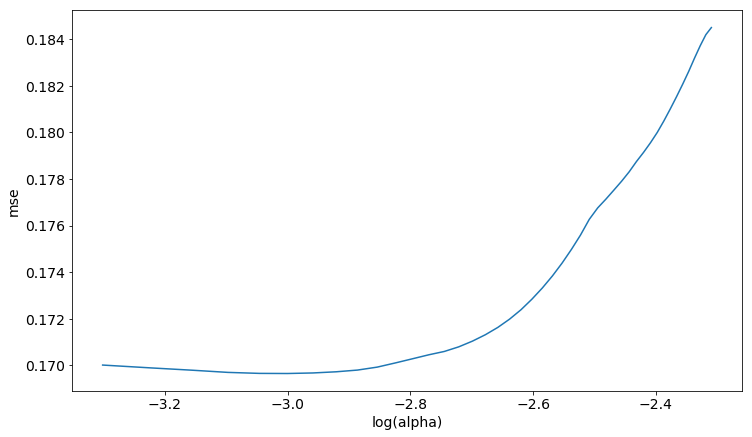

alpha is: 0.001


array([-0.10229372,  1.64413984,  0.63283603, -0.13822835, -0.18696794,
       -0.57597934,  0.06847921,  0.07300158, -1.16283352,  0.28103881,
       -0.31924742, -0.17716671,  0.03786476,  0.10713012, -0.07875417,
       -0.09658936, -0.0920184 ,  0.        ,  0.14989093,  0.13929876,
        0.02998253,  0.0166653 ,  0.04336261, -0.00737032, -0.02389997,
       -0.        ,  0.01736823, -0.        , -0.04482343, -0.02051679,
       -0.00174202,  0.        ,  0.00636308,  0.00735813,  0.0125949 ,
       -0.        ,  0.        ,  0.28374602, -0.        , -0.21039216])

In [187]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)
lasso.coef_  

In [188]:
print("The reg on train is %f" % lasso.score(X_train, y_train))
print ('The reg on test is %f'% lasso.score(X_test, y_test))
print ('The reg on 2012 is %f'% lasso.score(test_X, test_y))

The reg on train is 0.888691
The reg on test is 0.834094
The reg on 2012 is 0.751780


# 结论

lasso在test上的R^2=0.834094
比其它模型更好
应当选择RidgeCV

In [189]:
print ('The R^2 of RidgeCV on 2012 is %f'% lasso.score(test_X, test_y))

The R^2 of RidgeCV on 2012 is 0.751780
